In [2]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

-0.47862867319679353
-0.17809439002671373


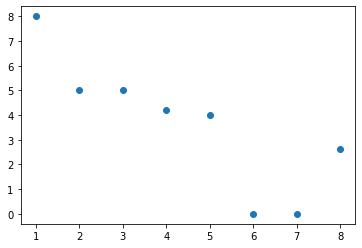

In [116]:
G = nx.read_gml("data/graph_florentine_families.gml")
G_rnd = nx.algorithms.smallworld.random_reference(G, niter = 10, connectivity=False)

node_avg_degree = nx.average_neighbor_degree(G) #Dict of average neighbor degree of each node
avg_neighbor_deg = [node_avg_degree[i] for i in G.nodes()] #array of average neighbor degree of each node
degree = [G.degree()[i] for i in G.nodes()] #array of degree of each node

plt_x = []
avg_degree_sum_list = []
count = []

for i in range(0, max(degree) + 1):
    plt_x.append(i)
    avg_degree_sum_list.append(0)
    count.append(0)

for x in range (0, len(degree)):
    k = degree[x]
    count[k] = count[k] + 1
    avg_degree_sum_list[k] = avg_degree_sum_list[k] + avg_neighbor_deg[x]

del plt_x[0]
del count[0]
del avg_degree_sum_list[0]

avg_degree_list = [i / j if j else 0 for i, j in zip(avg_degree_sum_list, count)]
plt.scatter(plt_x, avg_degree_list)
G_acoe = nx.degree_assortativity_coefficient(G)
G_rnd_acoe = nx.degree_assortativity_coefficient(G_rnd)
print(G_acoe)
print(G_rnd_acoe)

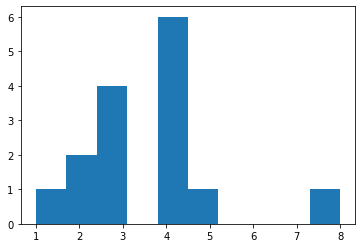

In [75]:
degrees = [G.degree(n) for n in G.nodes()]
plt.hist(degrees)
plt.show()